#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [ ]:
df = pd.read_csv('/content/CF(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,3.707000e+03,CF,M. Boselli,Club Estudiantes LP,Argentina,180,80,37,85,...,41,47,47,40,40,40,40,40,86,7.5
1,1,7.889000e+03,CF,C. Keșerü,Free Agents,Romania,178,71,36,77,...,51,59,48,40,40,40,40,40,81,4.1
2,2,8.944000e+03,CF,K. Benzema,Free Agents,France,185,81,35,90,...,49,63,60,40,40,40,40,40,96,740
3,3,9.182000e+03,CF,J. Ménez,Reggina 1914,France,183,79,35,80,...,46,58,45,40,40,40,40,40,84,4.7
4,4,1.503800e+04,CF,Hulk,Free Agents,Brazil,180,85,36,84,...,49,69,48,40,40,40,40,40,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,923,5.387740e+13,CF,Y. Suzuki,Kashima Antlers,Japan,182,75,26,79,...,61,59,74,40,40,40,40,40,88,0
924,924,5.387740e+13,CF,Thiago Santana,Shimizu S-Pulse,Brazil,184,80,29,81,...,60,70,61,40,40,40,40,40,88,0
925,925,5.387740e+13,CF,Y. Yamagishi,Avispa Fukuoka,Japan,183,80,29,73,...,63,69,64,40,40,40,40,40,85,0
926,926,5.387740e+13,CF,T. Miyashiro,Kawasaki Frontale,Japan,178,73,22,72,...,56,58,60,40,40,40,40,40,84,0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [ ]:


df = pd.read_csv('/content/CF(1).csv')

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)





In [ ]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,180,80,37,85,78,70,74,61,59,83,...,42,41,47,47,40,40,40,40,40,86
1,178,71,36,77,68,69,65,59,56,77,...,47,51,59,48,40,40,40,40,40,81
2,185,81,35,90,86,81,83,74,65,90,...,46,49,63,60,40,40,40,40,40,96
3,183,79,35,80,78,81,77,67,60,77,...,45,46,58,45,40,40,40,40,40,84
4,180,85,36,84,77,76,73,67,67,82,...,47,49,69,48,40,40,40,40,40,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,182,75,26,79,74,75,71,74,70,81,...,55,61,59,74,40,40,40,40,40,88
924,184,80,29,81,78,75,75,71,66,81,...,61,60,70,61,40,40,40,40,40,88
925,183,80,29,73,77,76,79,75,73,79,...,64,63,69,64,40,40,40,40,40,85
926,178,73,22,72,77,75,73,70,66,79,...,60,56,58,60,40,40,40,40,40,84


# EXPLORATORY DATA ANALYSIS

1) Centre Forward DataSet

In [ ]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,180,80,37,85,78,70,74,61,59,83,...,42,41,47,47,40,40,40,40,40,86
1,178,71,36,77,68,69,65,59,56,77,...,47,51,59,48,40,40,40,40,40,81
2,185,81,35,90,86,81,83,74,65,90,...,46,49,63,60,40,40,40,40,40,96
3,183,79,35,80,78,81,77,67,60,77,...,45,46,58,45,40,40,40,40,40,84
4,180,85,36,84,77,76,73,67,67,82,...,47,49,69,48,40,40,40,40,40,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,182,75,26,79,74,75,71,74,70,81,...,55,61,59,74,40,40,40,40,40,88
924,184,80,29,81,78,75,75,71,66,81,...,61,60,70,61,40,40,40,40,40,88
925,183,80,29,73,77,76,79,75,73,79,...,64,63,69,64,40,40,40,40,40,85
926,178,73,22,72,77,75,73,70,66,79,...,60,56,58,60,40,40,40,40,40,84


<Axes: >

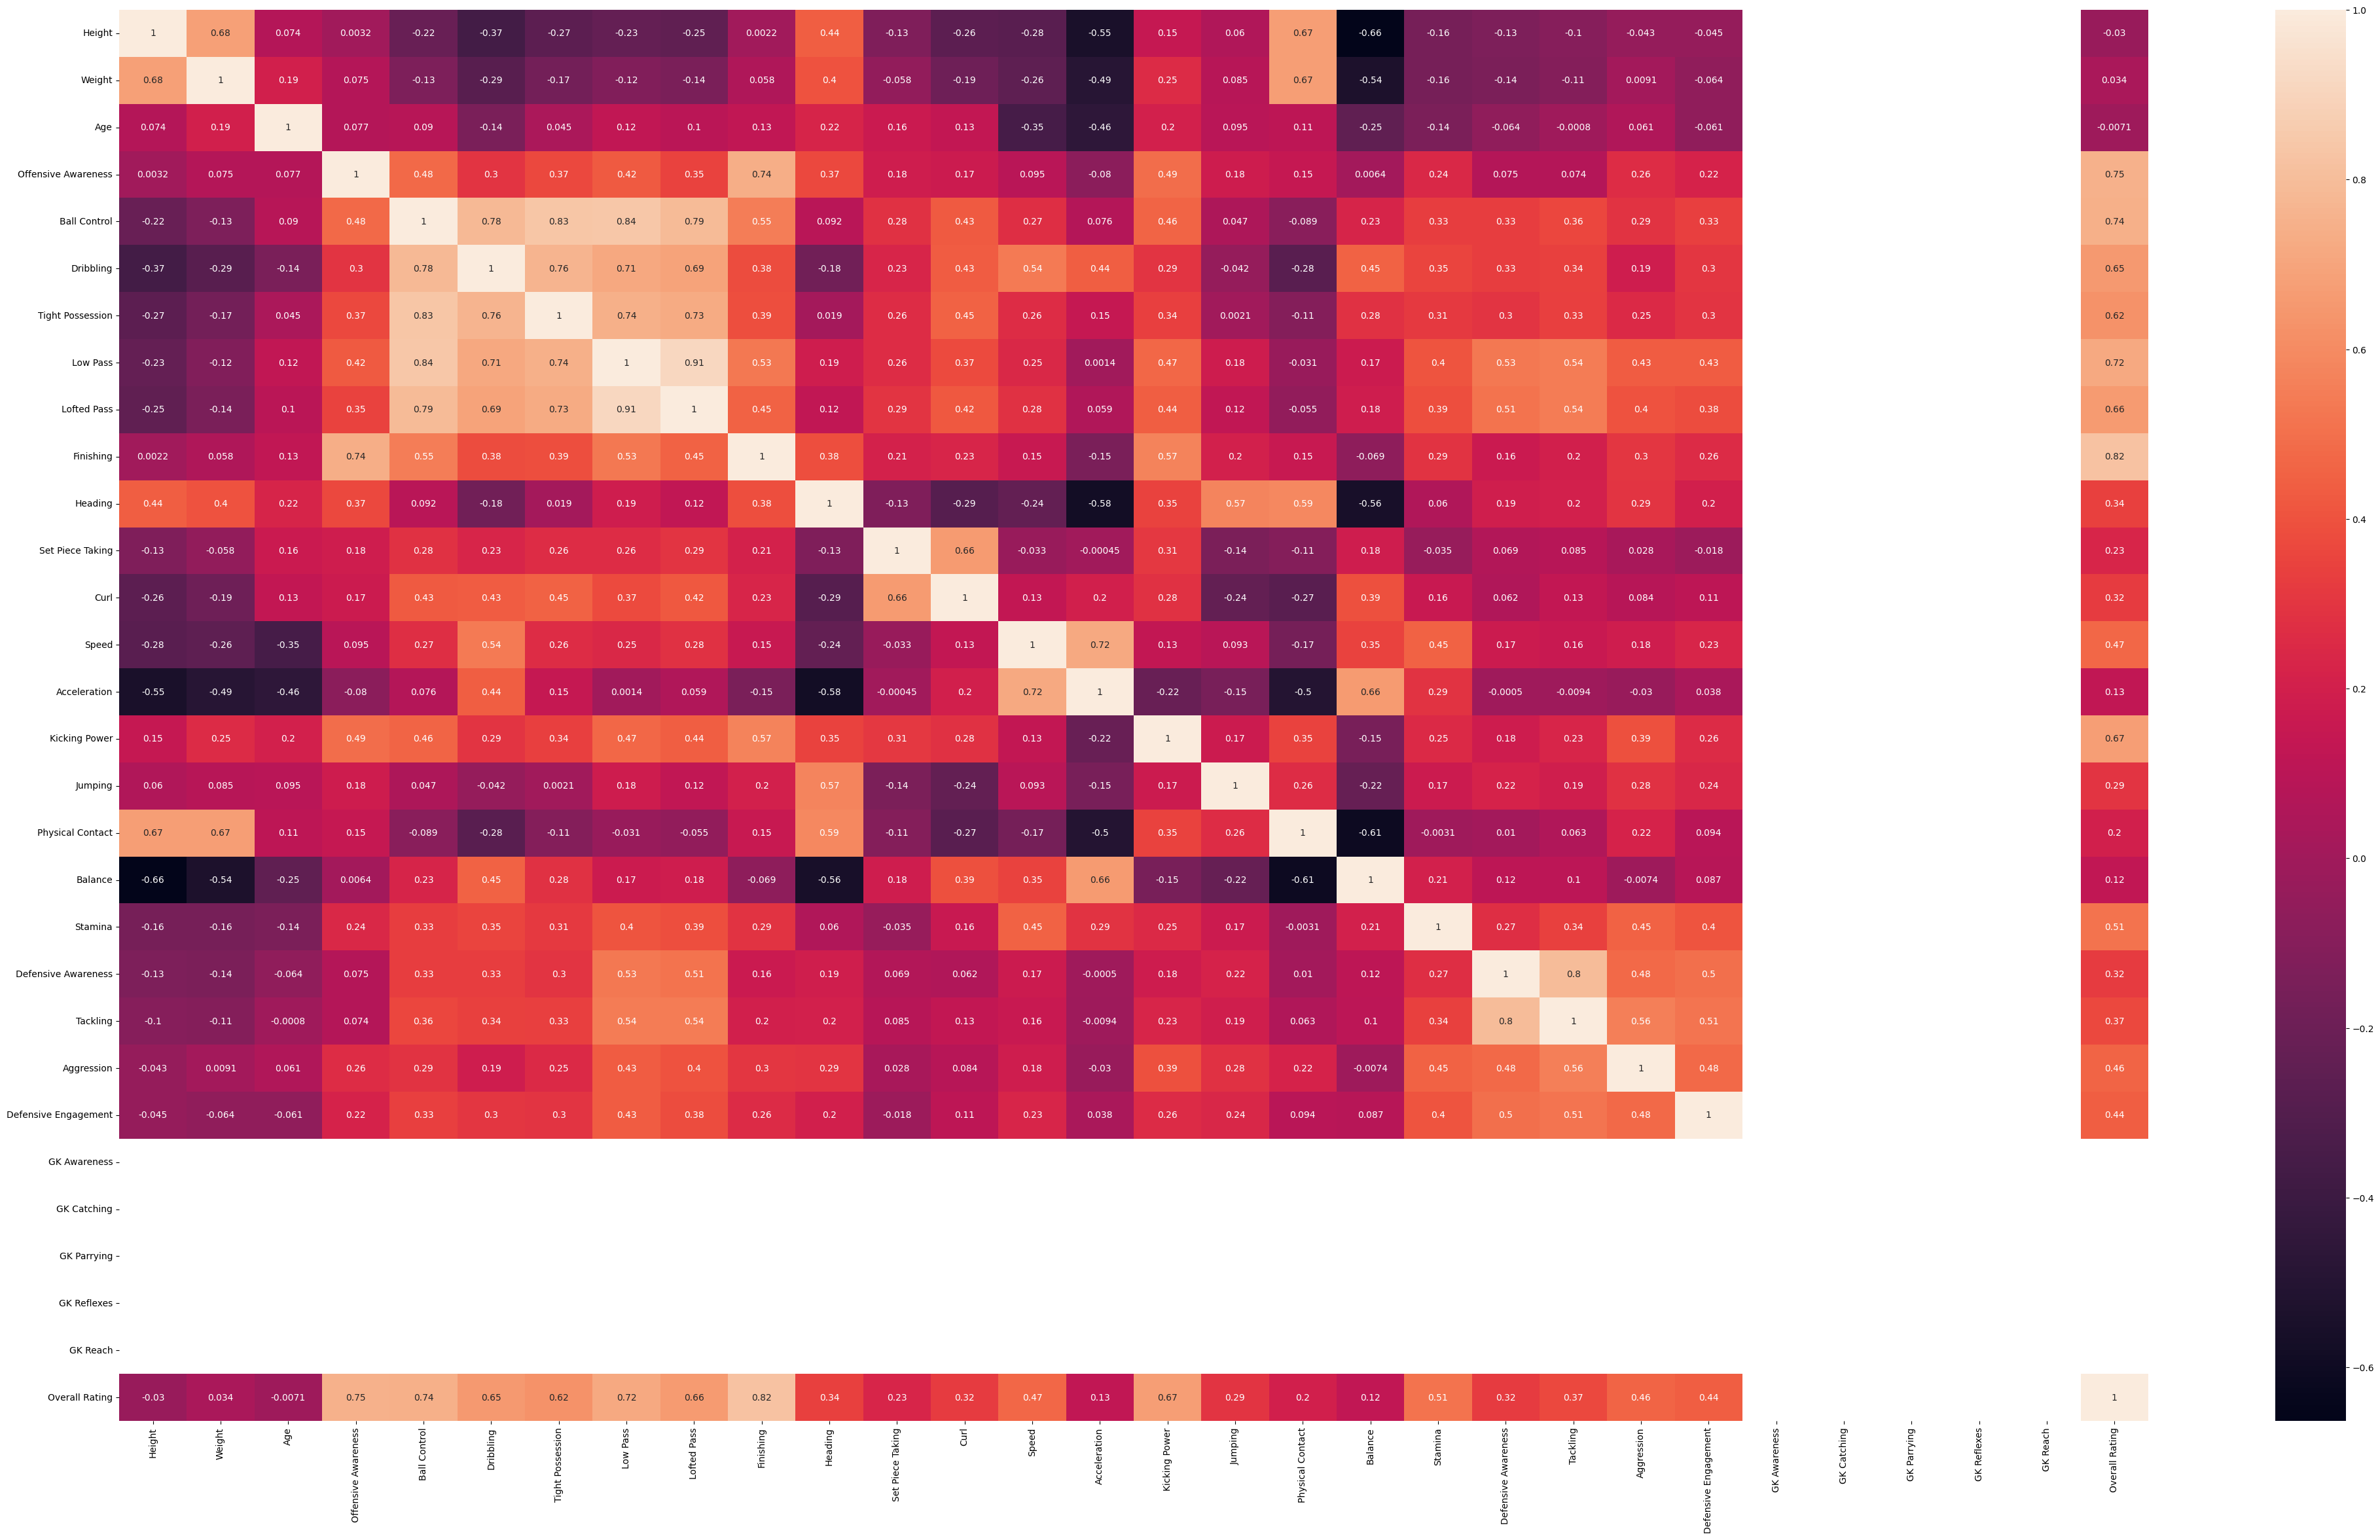

In [ ]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [ ]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Offensive Awareness', ylabel='Overall Rating'>

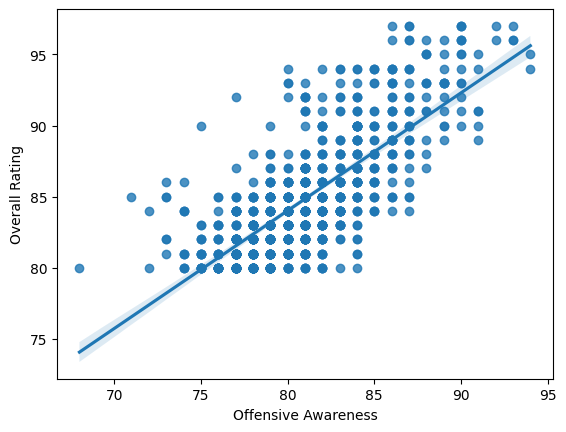

In [ ]:
sns.regplot(data = df, x = 'Offensive Awareness', y = 'Overall Rating')

<Axes: xlabel='Finishing', ylabel='Overall Rating'>

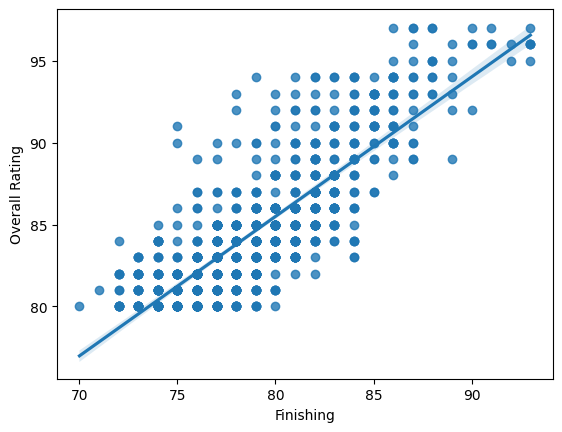

In [ ]:
sns.regplot(data = df, x = 'Finishing', y = 'Overall Rating')

<Axes: xlabel='Defensive Awareness', ylabel='Overall Rating'>

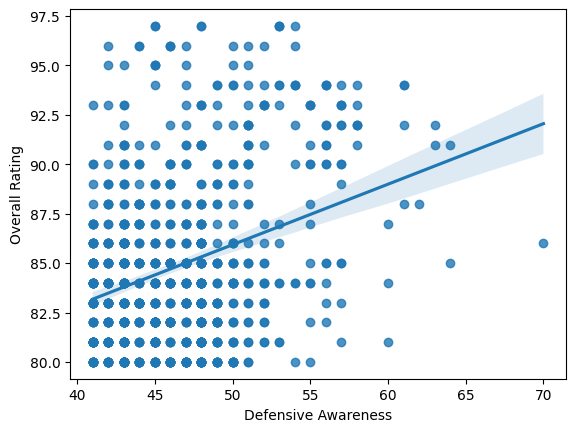

In [ ]:
sns.regplot(data = df, x = 'Defensive Awareness', y = 'Overall Rating')

Offensive Awareness and Finishing looks key stats for a centre forward while Defensive Awareness is not so important.

##Scaling And Train Test Split

In [ ]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(742, 27)

In [ ]:
X_test.shape

(186, 27)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=8,epochs=200)

Epoch 1/200
93/93 [==============================] - 7s 7ms/step - loss: 6372.4058 - val_loss: 3821.9812
Epoch 2/200
93/93 [==============================] - 0s 4ms/step - loss: 783.5242 - val_loss: 92.0592
Epoch 3/200
93/93 [==============================] - 0s 4ms/step - loss: 78.1866 - val_loss: 78.6881
Epoch 4/200
93/93 [==============================] - 0s 4ms/step - loss: 67.0702 - val_loss: 66.4890
Epoch 5/200
93/93 [==============================] - 0s 5ms/step - loss: 57.8268 - val_loss: 54.8144
Epoch 6/200
93/93 [==============================] - 0s 5ms/step - loss: 47.7370 - val_loss: 47.9758
Epoch 7/200
93/93 [==============================] - 1s 5ms/step - loss: 40.1398 - val_loss: 34.2715
Epoch 8/200
93/93 [==============================] - 1s 6ms/step - loss: 29.5800 - val_loss: 25.5284
Epoch 9/200
93/93 [==============================] - 0s 4ms/step - loss: 23.4973 - val_loss: 20.0886
Epoch 10/200
93/93 [==============================] - 0s 4ms/step - loss: 19.3291 - va

In [ ]:
model.save('CF_stats_predictor.h5')

## Now Repeat This process for all other data sets

In [ ]:
#losses = pd.DataFrame(model.history.history)

<Axes: >

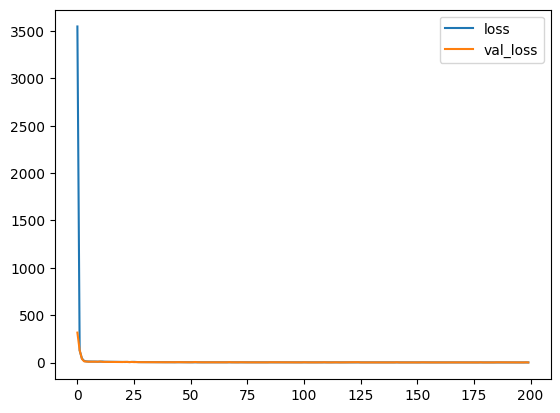

In [ ]:
#losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
#X_test

,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,Heading,Set Piece Taking,Curl,...,Stamina,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach
Height,,,,,,,,,,,,,,,,,,,,,
187,41,48,49,45,53,57,44,52,48,50,...,56,53,47,52,58,82,76,78,83,80
191,41,61,51,60,64,66,41,51,61,48,...,60,47,46,51,60,92,81,84,87,84
192,42,60,44,43,60,60,43,45,60,48,...,59,41,42,45,59,84,73,75,80,76
190,41,56,48,50,59,61,43,48,56,53,...,59,51,48,62,60,87,78,83,83,82
198,41,56,43,44,56,57,41,45,56,43,...,55,46,44,52,60,84,82,77,80,88
191,47,52,48,53,53,52,47,47,52,50,...,58,50,52,52,66,72,76,76,77,77
193,41,48,44,43,49,53,42,49,43,43,...,48,43,45,42,60,76,73,75,74,77
202,48,63,54,59,66,72,48,57,75,73,...,58,51,51,48,68,79,75,77,82,84
197,45,60,55,52,60,65,45,60,60,52,...,59,57,55,57,70,84,79,78,83,87


In [ ]:
#predictions = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [ ]:
#mean_absolute_error(y_test,predictions)

0.8091767834078881

In [ ]:
#model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 27)                729       
                                                                 
 dense_37 (Dense)            (None, 27)                756       
                                                                 
 dense_38 (Dense)            (None, 27)                756       
                                                                 
 dense_39 (Dense)            (None, 1)                 28        
                                                                 
Total params: 2,269
Trainable params: 2,269
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.get_layer('dense_1').get_weights()

ValueError: ignored

###Predicting On a New Player

In [ ]:
#pl = df.drop('Overall Rating',axis=1).iloc[900]

In [ ]:
#pl = scaler.transform(pl.values.reshape(-1,26))

In [ ]:
#pl

In [ ]:
#model.predict(pl)

In [ ]:
#df.iloc[900]

In [ ]:
#model.get_weights()

In [ ]:
#df

In [ ]:
new_row = [188,83,84,93,82,73,71,84,71,66,78,92,92,83,75,83,87,79,50,52,63,58,40,40,40,40,40,40]
newDF.append(pd.Series(new_row, index=newDF.columns[:len(new_row)]), ignore_index=True)

In [ ]:
model.save('cf_stats_predictor.h5')